In [1]:
# 导入库
import pandas as pd
import matplotlib.pyplot as plt
import portfolio_construction_functions as pc


In [59]:
# 导入情感数据
Decay_number = 10
path_Reuter = '../Data/Sentiment_Scores/Decay_data/Merged Sentiment Reuters Decay' + str(Decay_number) + '.csv'
path_MW = '../Data/Sentiment_Scores/Decay_data/Merged Sentiment MW Decay' + str(Decay_number) + '.csv'
path_CNN = '../Data/Sentiment_Scores/Decay_data/Merged Sentiment CNN Decay' + str(Decay_number) + '.csv'

df_Reuters_sentiment = pd.read_csv(path_Reuter)
df_MW_sentiment = pd.read_csv(path_MW)
df_CNN_sentiment = pd.read_csv(path_CNN)

# 拼接两个网站的情感分数
df_sentiment = [df_MW_sentiment, df_Reuters_sentiment, df_CNN_sentiment]
# df_sentiment = [df_MW_sentiment]
# df_sentiment = [df_Reuters_sentiment]
df_sentiment = pd.concat(df_sentiment)
df_sentiment = df_sentiment.groupby(['Date', 'Country']).mean(numeric_only=True).reset_index()

# 修改列名
df_sentiment = df_sentiment.rename(columns={
    'LMD_Polarity': 'LMD',
    'HIV4_Polarity': 'HIV4',
    'Vader_Polarity': 'Vader',
    'FinBert_Polarity': 'FinBert'
})

# 展示数据
df_sentiment.head()

,Date,Country,Unnamed: 0,LMD,HIV4,Vader,FinBert
0,2012-01-02,Australia,0.0,0.333333,0.166667,0.259433,0.313376
1,2012-01-02,Canada,3000.0,0.000000,0.000000,0.000000,0.000000
2,2012-01-02,China,6000.0,-0.142857,-0.111111,-0.008600,-0.297623
3,2012-01-02,Denmark,9000.0,0.000000,0.000000,0.000000,0.000000
4,2012-01-02,Finland,12000.0,0.000000,0.000000,0.000000,0.000000


In [60]:
# 导入收益率数据
df_return = pd.read_csv('../Data/daily_return.csv')

# 展示数据
df_return.head()

# # 展示为0或者NA的数据的数量
# print('Number of 0 or NA in each column:')
# print(df_return.isin([0, np.nan]).sum())


,Date,New Zealand,United Kingdom,Finland,Norway,United States,Sweden,Korea,Japan,Canada,...,Australia,Germany,France,China,Switzerland,Spain,Denmark,Italy,Singapore,Portugal
0,2011-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011-12-02,-0.010866,-0.207038,0.302897,0.235483,0.489692,0.154354,0.094609,-0.042270,0.178307,...,0.053087,0.393824,-1.345329,0.328191,0.241278,0.536400,0.065521,-0.189497,-0.251753,0.148492
2,2011-12-05,0.077141,-0.460678,-0.474224,-0.158909,-0.084015,-0.179613,0.056292,0.165816,0.227525,...,0.302855,-0.615728,1.099039,0.264403,-0.125720,3.778843,-1.723893,5.259712,-0.012405,3.308727
3,2011-12-06,0.201784,0.810078,0.100602,-0.190226,-0.406179,0.198203,-0.004941,0.066255,-0.330724,...,0.354603,0.150150,-0.863361,-0.157734,0.335027,-0.630513,0.272330,0.715348,0.047384,1.062182
4,2011-12-07,0.187048,0.129148,0.496636,0.290407,0.543003,0.567308,-0.043160,0.002849,0.596567,...,-0.273399,0.762903,0.199724,0.001528,0.198283,-1.476326,-0.028845,-0.948723,-0.251362,1.737582


In [61]:
# 转换日期格式
df_sentiment['Date'] = pd.to_datetime(df_sentiment['Date'], format='%Y-%m-%d')
df_return['Date'] = pd.to_datetime(df_return['Date'], format='%Y-%m-%d')

# 生成日期范围
all_dates = pd.date_range(start='2016-01-01', end='2022-12-31').tolist()
df_return = df_return[df_return['Date'].isin(all_dates)]
df_sentiment = df_sentiment[df_sentiment['Date'].isin(all_dates)]

# 去掉无用的列
df_sentiment = df_sentiment.drop(columns=['Unnamed: 0'])
# df_sentiment = df_sentiment.drop(columns=['Unnamed: 0.1'])


# 过滤掉周末的情感数据
# df_sentiment = df_sentiment[df_sentiment['Date'].dt.dayofweek < 5]


# 填充NA为0
# df_sentiment = df_sentiment.fillna(0)

# Calculate the average sentiment for each country
average_polarity = df_sentiment[['LMD', 'HIV4', 'Vader', 'FinBert']].mean(axis=1)

# Create a new DataFrame to store the results
df_sentiment_aver = pd.DataFrame({
    'Date': df_sentiment['Date'],
    'Country': df_sentiment['Country'],
    'Average': average_polarity
})

# Rank the average sentiment for each day
df_sentiment_aver['Average_Rank'] = df_sentiment_aver.groupby('Date')['Average'].rank(ascending=False, method='first')


In [62]:
# 循环读取每个国家情感分数, 然后统计每个国家的非NaN值数量
for country in df_sentiment['Country'].unique():
    print(country)
    temp = df_sentiment[df_sentiment['Country'] == country].count()
    print(temp)
    print(temp.iloc[2] / temp.iloc[1])
    print('------------------')


Australia
Date       1826
Country    1826
LMD        1826
HIV4       1826
Vader      1826
FinBert    1826
dtype: int64
1.0
------------------
Canada
Date       1826
Country    1826
LMD        1826
HIV4       1826
Vader      1826
FinBert    1826
dtype: int64
1.0
------------------
China
Date       1826
Country    1826
LMD        1826
HIV4       1826
Vader      1826
FinBert    1826
dtype: int64
1.0
------------------
Denmark
Date       1826
Country    1826
LMD        1826
HIV4       1826
Vader      1826
FinBert    1826
dtype: int64
1.0
------------------
Finland
Date       1826
Country    1826
LMD        1826
HIV4       1826
Vader      1826
FinBert    1826
dtype: int64
1.0
------------------
France
Date       1826
Country    1826
LMD        1826
HIV4       1826
Vader      1826
FinBert    1826
dtype: int64
1.0
------------------
Germany
Date       1826
Country    1826
LMD        1826
HIV4       1826
Vader      1826
FinBert    1826
dtype: int64
1.0
------------------
Italy
Date       1826


In [63]:
# 展示情感数据
df_sentiment

,Date,Country,LMD,HIV4,Vader,FinBert
25056,2016-01-01,Australia,-0.149488,7.738227e-02,-0.266853,-2.427891e-01
25057,2016-01-01,Canada,-0.290183,-9.672783e-02,-0.110792,-2.161110e-01
25058,2016-01-01,China,-0.239988,2.753615e-01,0.152296,5.662043e-02
25059,2016-01-01,Denmark,-0.000043,-4.479458e-17,-0.000073,-3.501620e-16
25060,2016-01-01,Finland,0.000003,2.308695e-06,0.000009,8.089496e-06
...,...,...,...,...,...,...
68875,2022-12-30,Switzerland,-0.254154,6.821800e-02,-0.311452,-3.765874e-01
68876,2022-12-30,United Kingdom,-0.360886,-2.925059e-02,-0.424438,-4.829192e-01
68877,2022-12-30,United States,-0.617610,2.484910e-01,-0.055600,-8.044713e-01
68878,2022-12-30,UnitedKingdom,0.615572,4.211810e-01,0.608616,4.194709e-01


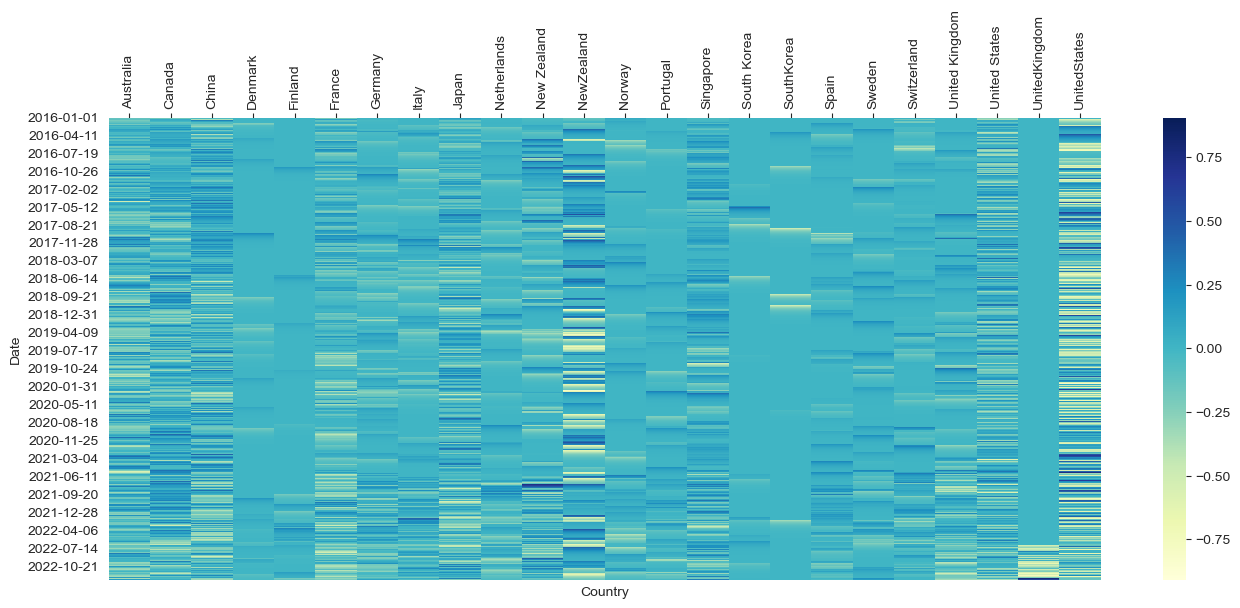

In [64]:
# 展示数据的Heatmap图, 颜色越深代表情感分数越高, 也就是越值得投资
pc.plot_sentiment_heatmap(df_sentiment_aver, '../Data/Images/Heatmap.png')
plt.show()

In [65]:
# 将Average_Polarity和Return赋给merged_data
merged_data = pd.merge(df_sentiment_aver, df_sentiment, on=['Date', 'Country'], how='outer')
df_return_melted = df_return.melt(id_vars='Date', var_name='Country', value_name='Return')
merged_data = pd.merge(merged_data, df_return_melted, on=['Date', 'Country'], how='outer')
column_order = ['Date', 'Country', 'LMD', 'HIV4', 'Vader', 'FinBert', 'Average', 'Return']
merged_data = merged_data[column_order]

merged_data

,Date,Country,LMD,HIV4,Vader,FinBert,Average,Return
0,2016-01-01,Australia,-0.149488,7.738227e-02,-0.266853,-2.427891e-01,-0.145437,0.012079
1,2016-01-01,Canada,-0.290183,-9.672783e-02,-0.110792,-2.161110e-01,-0.178454,0.003814
2,2016-01-01,China,-0.239988,2.753615e-01,0.152296,5.662043e-02,0.061072,0.007740
3,2016-01-01,Denmark,-0.000043,-4.479458e-17,-0.000073,-3.501620e-16,-0.000029,0.002515
4,2016-01-01,Finland,0.000003,2.308695e-06,0.000009,8.089496e-06,0.000006,0.002510
...,...,...,...,...,...,...,...,...
45645,2022-12-26,Korea,NaN,NaN,NaN,NaN,NaN,-0.663004
45646,2022-12-27,Korea,NaN,NaN,NaN,NaN,NaN,0.253145
45647,2022-12-28,Korea,NaN,NaN,NaN,NaN,NaN,-0.524433
45648,2022-12-29,Korea,NaN,NaN,NaN,NaN,NaN,-0.515474


In [66]:
merged_data = merged_data.dropna(subset=['Return'])

## Correlation And Accuracy

In [67]:
correlations_result = pc.check_correlation(merged_data, 'Return')
print(correlations_result)

     Method  Correlation with Return
23      LMD                 0.004568
25  FinBert                -0.005825
28  Average                -0.009744
31     HIV4                -0.009992
33    Vader                -0.013827


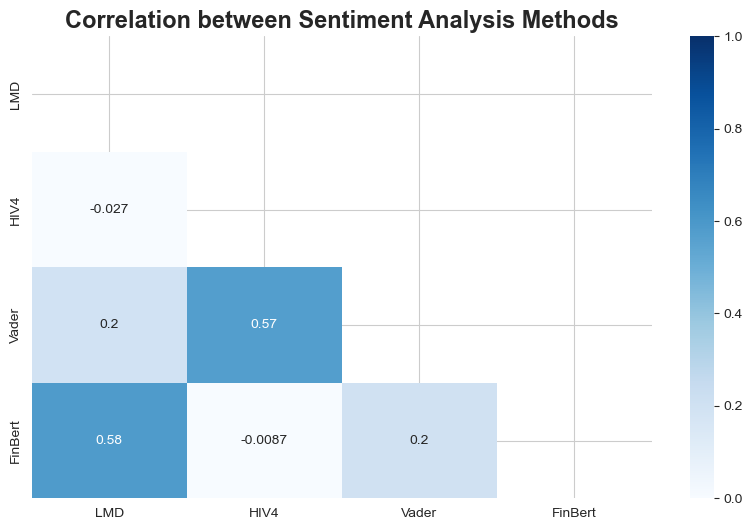

In [68]:
pc.plot_correlation_heatmap(merged_data, columns=['LMD','HIV4','Vader', 'FinBert'], title="Correlation between Sentiment Analysis Methods")
plt.show()

In [69]:
# 使用不同的策略计算收益率
strategies = ['LMD', 'HIV4', 'Vader', 'FinBert', 'Average']
dict_ret = pc.compute_strategy_performance(merged_data, strategies, all_dates)

new_portfolio_25 = pd.DataFrame(dict_ret).transpose()
new_portfolio_25 = new_portfolio_25.rename(columns={0: 'LMD', 1: 'HIV4', 2: 'Vader', 3: 'FinBert', 4: 'Average'})
new_portfolio_25.reset_index(inplace=True)
new_portfolio_25.rename(columns={'index': 'Date'}, inplace=True)

# new_portfolio_25.to_csv('../Data/25_percent_portfolio.csv')

In [70]:
new_portfolio_25

,Date,LMD,HIV4,Vader,FinBert,Average
0,2016-01-01,-0.002162,0.002227,-0.007976,0.004505,-0.001400
1,2016-01-02,0.000000,0.000000,0.000000,0.000000,0.000000
2,2016-01-03,0.000000,0.000000,0.000000,0.000000,0.000000
3,2016-01-04,0.228997,-0.243799,-0.341614,0.079384,0.119374
4,2016-01-05,-0.031843,0.048803,0.227268,0.090637,0.064458
...,...,...,...,...,...,...
2552,2022-12-27,-0.308508,0.282642,0.081222,-0.141386,0.064186
2553,2022-12-28,0.023583,-0.533842,-0.732673,0.044221,-0.764556
2554,2022-12-29,0.075518,0.121406,-0.207564,0.204411,-0.157950
2555,2022-12-30,-0.248162,-0.259381,0.332949,-0.201212,0.087701


### IR of Long-Short Portfolio

In [71]:
IR_values = pc.compute_information_ratio(new_portfolio_25, strategies)
print(IR_values)

{'LMD': -0.003052061626709053, 'HIV4': -0.0025156482545359146, 'Vader': -0.01977590210694474, 'FinBert': 0.0004890082678798471, 'Average': -0.013608404778194883}


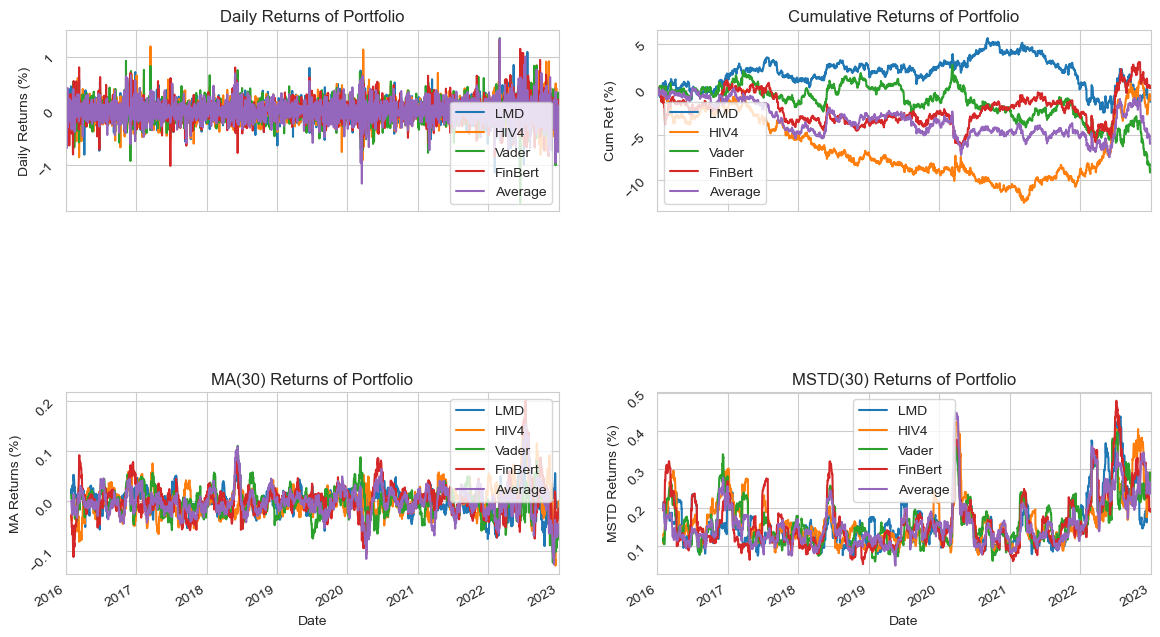

In [72]:
pc.plot_portfolio_summary(new_portfolio_25)
plt.show()